In [ ]:
!pip install qiskit qiskit-ibm-runtime pylatexenc qiskit_aer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.9/359.9 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 7.1 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256

In [ ]:

#initialization

import numpy as np
from numpy import linalg as LA

# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT

import qiskit
qiskit.version.get_version_info()



'2.0.0'

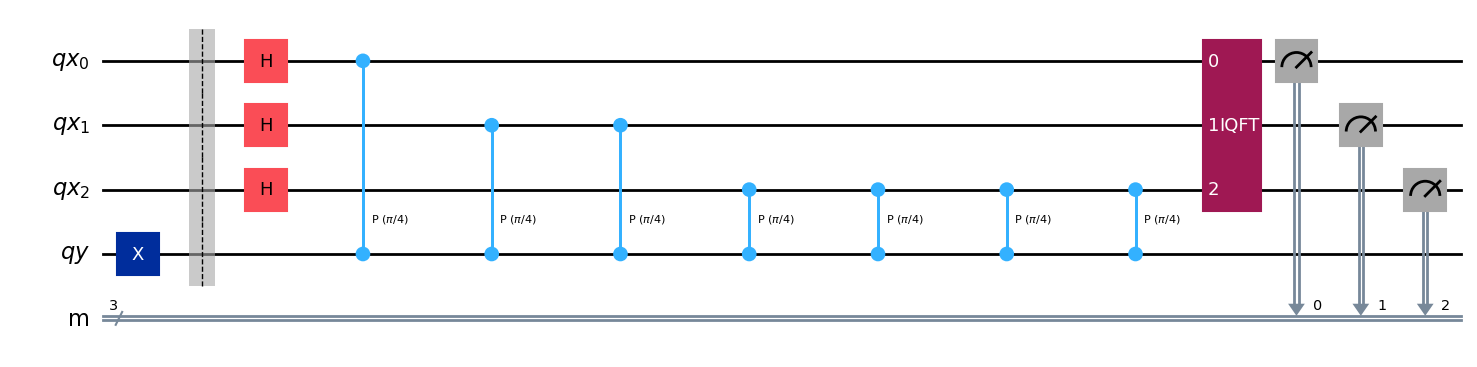

In [ ]:
# phase estimation circuit
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT

t = 3
n = 1
rx = QuantumRegister(t,'qx')
ry = QuantumRegister(n,'qy')
rc = ClassicalRegister(t,'m')
qpe = QuantumCircuit(rx, ry, rc)

phase = 1/8
qpe.x(ry) # eigenstate |1>
qpe.barrier()

qpe.h(rx)

for i in range(t):
    for j in range(2**i):
        qpe.cp(2*np.pi*phase, rx[i], ry)

qpe.append(QFT(t,inverse=True),rx)
qpe.measure(rx,rc)
qpe.draw(output='mpl',fold=-1)



{'001': 10000}


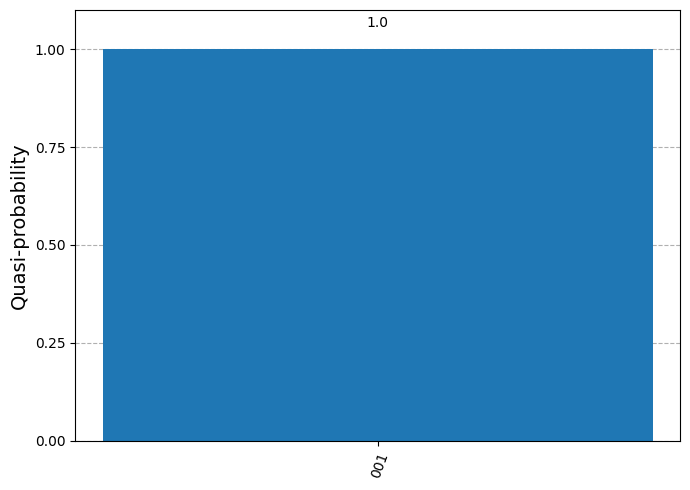

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qpe)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=10000)
result = job.result()
count = result[0].data.m.get_counts()
print(count)

from qiskit.visualization import plot_distribution
plot_distribution(count)

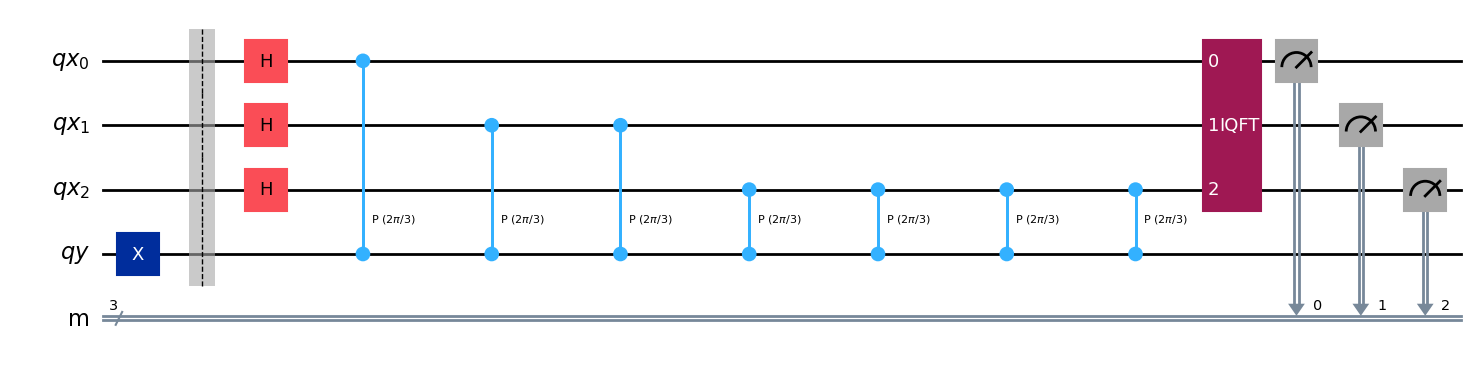

In [ ]:
# phase estimation circuit
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT

t = 3
n = 1
rx = QuantumRegister(t,'qx')
ry = QuantumRegister(n,'qy')
rc = ClassicalRegister(t,'m')
qpe = QuantumCircuit(rx, ry, rc)

phase = 1/3
qpe.x(ry) # eigenstate |1>
qpe.barrier()

qpe.h(rx)

for i in range(t):
    for j in range(2**i):
        qpe.cp(2*np.pi*phase, rx[i], ry)

qpe.append(QFT(t,inverse=True),rx)
qpe.measure(rx,rc)
qpe.draw(output='mpl',fold=-1)



{'011': 6883, '001': 334, '010': 1773, '100': 429, '101': 197, '000': 152, '111': 117, '110': 115}


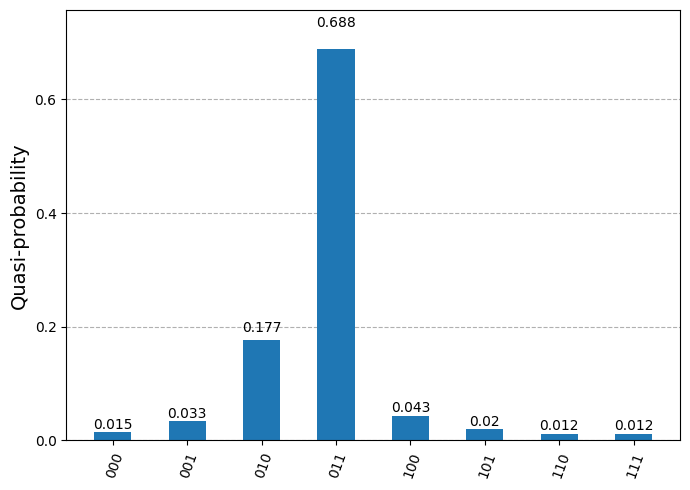

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qpe)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=10000)
result = job.result()
count = result[0].data.m.get_counts()
print(count)

from qiskit.visualization import plot_distribution
plot_distribution(count)

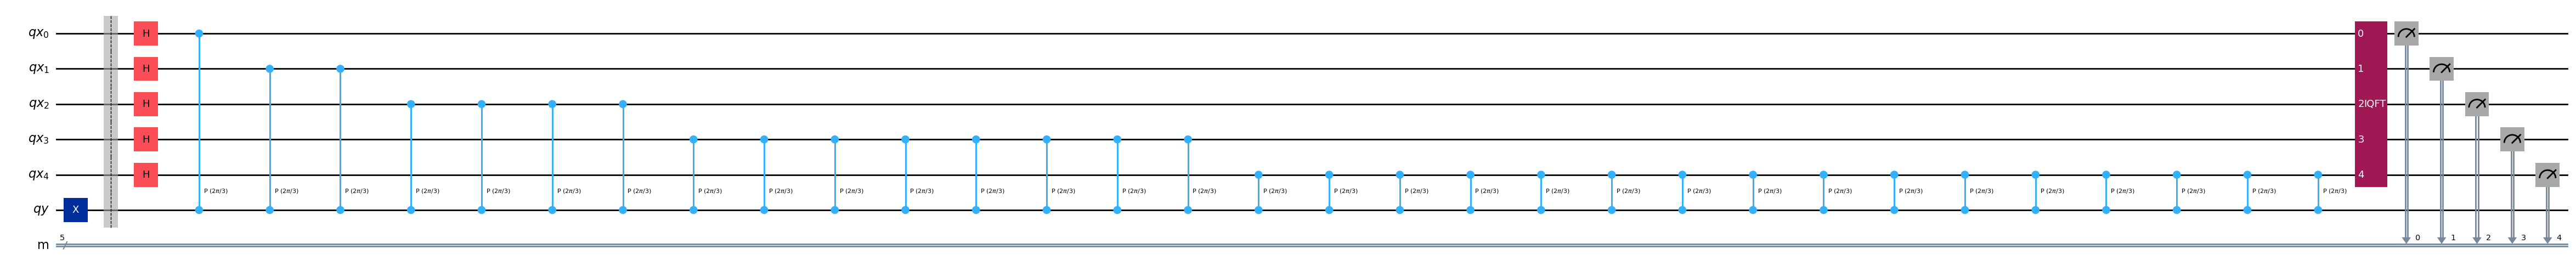

In [ ]:
# phase estimation circuit
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT

t = 5
n = 1
rx = QuantumRegister(t,'qx')
ry = QuantumRegister(n,'qy')
rc = ClassicalRegister(t,'m')
qpe = QuantumCircuit(rx, ry, rc)

phase = 1/3
qpe.x(ry) # eigenstate |1>
qpe.barrier()

qpe.h(rx)

for i in range(t):
    for j in range(2**i):
        qpe.cp(2*np.pi*phase, rx[i], ry)

qpe.append(QFT(t,inverse=True),rx)
qpe.measure(rx,rc)
qpe.draw(output='mpl',fold=-1)



{'01011': 6748, '01010': 1786, '01101': 144, '10001': 28, '01001': 272, '01100': 455, '00101': 36, '01110': 72, '10010': 24, '01000': 107, '11100': 9, '00000': 10, '00100': 16, '00111': 51, '00011': 5, '11111': 9, '10110': 10, '11110': 4, '01111': 39, '10000': 34, '11000': 14, '11001': 5, '10011': 20, '11101': 5, '00001': 16, '00010': 9, '10100': 9, '00110': 37, '10101': 13, '10111': 4, '11010': 7, '11011': 2}


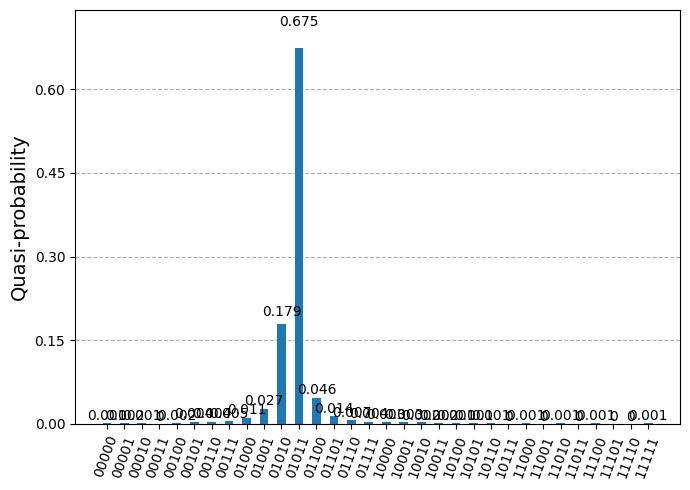

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qpe)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=10000)
result = job.result()
count = result[0].data.m.get_counts()
print(count)

from qiskit.visualization import plot_distribution
plot_distribution(count)

In [ ]:
U = [[np.exp(2j*np.pi/8), 0, 0, 0],
        [0, np.exp(2j*np.pi*2/8), 0, 0],
        [0, 0, np.exp(2j*np.pi*3/8), 0],
        [0, 0, 0, np.exp(2j*np.pi*4/8)]]

from qiskit.visualization import array_to_latex
array_to_latex(U, prefix="U = ",max_size=16)

<IPython.core.display.Latex object>

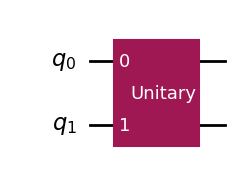

In [ ]:
Ucircuit = QuantumCircuit(2)
Ucircuit.unitary(U, [0,1])
Ucircuit.draw(output='mpl')

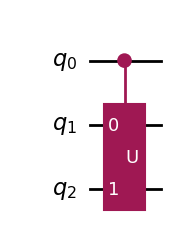

In [ ]:

# Ucircuit 을 Gate 객체 Ugate 로 만들고 이름을 "U"로 정한다.
Ugate = Ucircuit.to_gate()
Ugate.name = "U"

# 제어-U 게이트 cUgate 를 만들고 양자 회로 qc 에 연결한다.
cUgate = Ugate.control(1)
qc = QuantumCircuit(3)
qc.append(cUgate, [0,1,2]) # q0 is control
qc.draw(output='mpl')

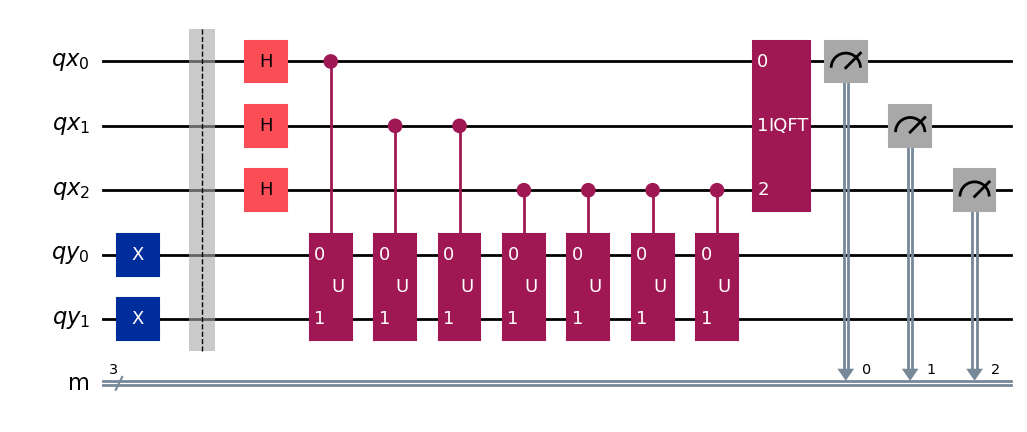

In [ ]:
# phase estimation circuit
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT

t = 3
n = 2
rx = QuantumRegister(t,'qx')
ry = QuantumRegister(n,'qy')
rc = ClassicalRegister(t,'m')
qpe = QuantumCircuit(rx, ry, rc)

qpe.x(ry) # eigenstate |11>
qpe.barrier()

qpe.h(rx)
for i in range(t):
    for j in range(2**i):
        qpe.append(cUgate, [rx[i], ry[0], ry[1]]); # controlled-U

qpe.append(QFT(t,inverse=True),rx)
qpe.measure(rx,rc)
qpe.draw(output='mpl',fold=-1)

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qpe)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=1)
result = job.result()
count = result[0].data.m.get_counts()
print(count)

{'100': 1}


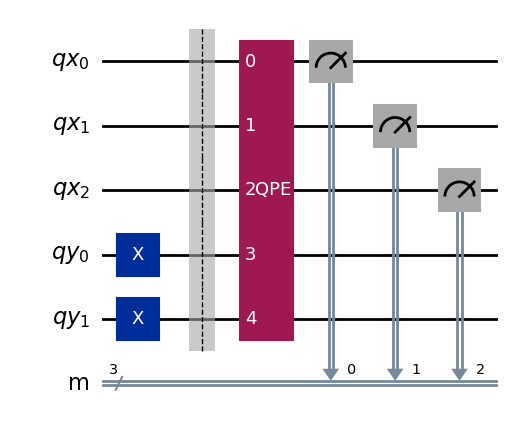

In [ ]:
# phase estimation using PhaseEstimation class with QFT
from qiskit.circuit.library import QFT,PhaseEstimation

t = 3
n = 2
rx = QuantumRegister(t,'qx')
ry = QuantumRegister(n,'qy')
rc = ClassicalRegister(t,'m')
qpe = QuantumCircuit(rx, ry, rc)

qpe.x(ry) # eigenstate |11>
qpe.barrier()

qpe.append(PhaseEstimation(t,Ugate,QFT(t,inverse=True)),rx[:]+ry[:])

qpe.measure(rx,rc)
qpe.draw(output='mpl',fold=-1)

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qpe)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=1)
result = job.result()
count = result[0].data.m.get_counts()
print(count)


{'100': 1}


In [ ]:
# myQPE() returns phase estimation circuit
from qiskit.circuit.library import QFT

def myQPE(t, unitary):
    n = unitary.num_qubits
    rx = QuantumRegister(t,'qx')
    ry = QuantumRegister(n,'qy')
    qc = QuantumCircuit(rx, ry)

    # QuantumCircuit 객체 unitary 를 Gate 객체 gate 로 만들고 이름을 "U"로 정한다.
    Ugate = unitary.to_gate()
    Ugate.name = "U"

    # 제어-U 게이트 c_gate 를 만들고 QPE 회로를 생성한다.
    c_gate = Ugate.control(1)

    qc.h(rx)
    for i in range(t):
      for j in range(2 ** i):
        qc.append(c_gate, rx[i: i+1] + ry[:])

    qc.append(QFT(t, inverse=True), rx)

    qc.name = 'myQPE'
    return qc

In [ ]:
n = 2
U = [[np.exp(2j*np.pi/8), 0, 0, 0],
        [0, np.exp(2j*np.pi*2/8), 0, 0],
        [0, 0, np.exp(2j*np.pi*3/8), 0],
        [0, 0, 0, np.exp(2j*np.pi*4/8)]]

from qiskit.visualization import array_to_latex
array_to_latex(U, prefix="U = ",max_size=16)

<IPython.core.display.Latex object>

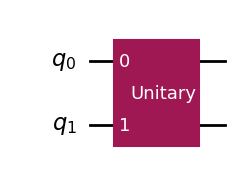

In [ ]:
unitary = QuantumCircuit(n)
unitary.unitary(U, range(n))
unitary.draw(output='mpl')

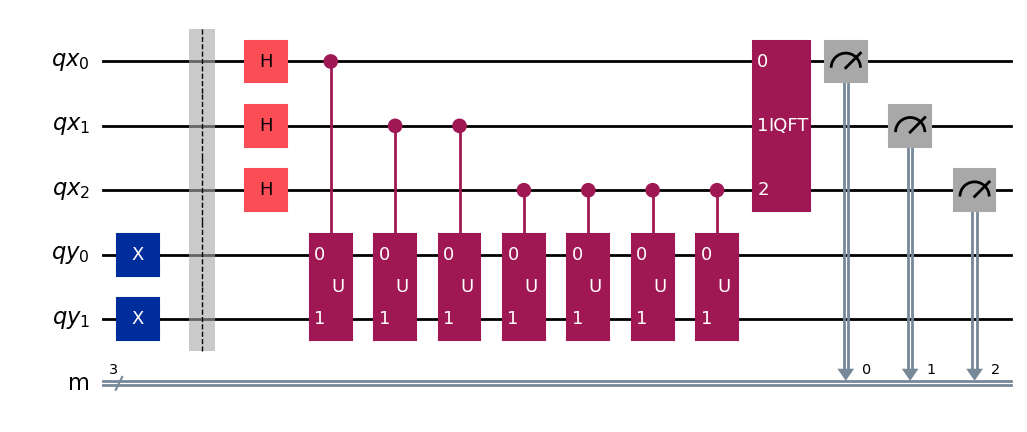

In [ ]:
# phase estimation using myQPE function
from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit
t = 3

rx = QuantumRegister(t,'qx')
ry = QuantumRegister(n,'qy')
rc = ClassicalRegister(t,'m')
qpe = QuantumCircuit(rx, ry, rc)
qpe.x(ry[:]) # input state = |11>
qpe.barrier()
qpe.compose(myQPE(t,unitary),rx[:]+ry[:],inplace=True)
qpe.measure(rx,rc)
qpe.draw(output='mpl',fold=-1)

{'100': 10000}


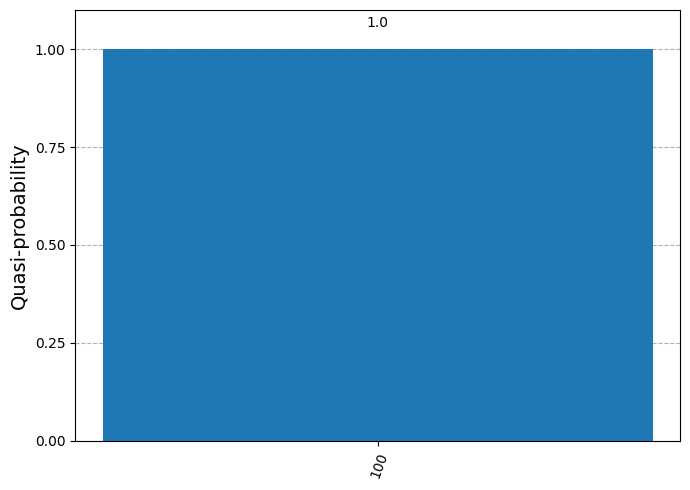

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qpe)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=10000)
result = job.result()
count = result[0].data.m.get_counts()
print(count)

from qiskit.visualization import plot_distribution
plot_distribution(count)

In [ ]:
n = 3

U = [[np.exp(2j*np.pi/8), 0, 0, 0, 0, 0, 0, 0],
        [0, np.exp(2j*np.pi*2/8), 0, 0, 0, 0, 0, 0],
        [0, 0, np.exp(2j*np.pi*3/8), 0, 0, 0, 0, 0],
        [0, 0, 0, np.exp(2j*np.pi*4/8), 0, 0, 0, 0],
        [0, 0, 0, 0, np.exp(2j*np.pi*3/5), 0, 0, 0],
        [0, 0, 0, 0, 0, np.exp(2j*np.pi*1/6), 0, 0],
        [0, 0, 0, 0, 0, 0, np.exp(2j*np.pi*2/7), 0],
        [0, 0, 0, 0, 0, 0, 0, np.exp(2j*np.pi*1/9)]]

from qiskit.visualization import array_to_latex
array_to_latex(U, prefix="U = ",max_size=16)

<IPython.core.display.Latex object>

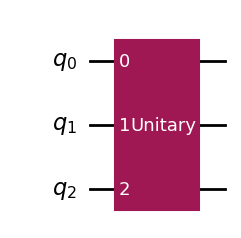

In [ ]:
unitary = QuantumCircuit(n)
unitary.unitary(U, range(n))
unitary.draw(output='mpl')

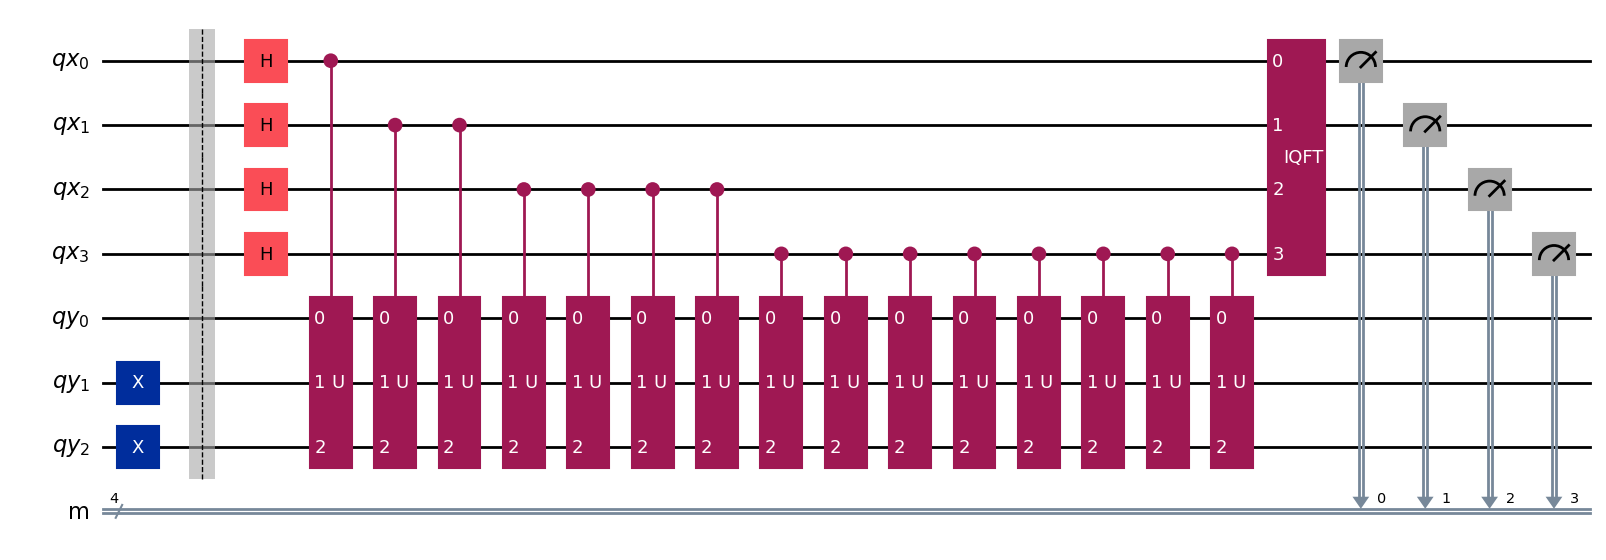

In [ ]:
# phase estimation using myQPE function
from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit
t = 4

rx = QuantumRegister(t,'qx')
ry = QuantumRegister(n,'qy')
rc = ClassicalRegister(t,'m')
qpe = QuantumCircuit(rx, ry, rc)
qpe.x(ry[1:]) # input state = |110>
qpe.barrier()
qpe.compose(myQPE(t,unitary),rx[:]+ry[:],inplace=True)
qpe.measure(rx,rc)
qpe.draw(output='mpl',fold=-1)

{'0111': 184, '0101': 5226, '0100': 2926, '0001': 95, '0010': 181, '0011': 416, '1000': 99, '1101': 39, '0110': 488, '1111': 45, '1100': 45, '0000': 73, '1001': 60, '1010': 42, '1110': 34, '1011': 47}


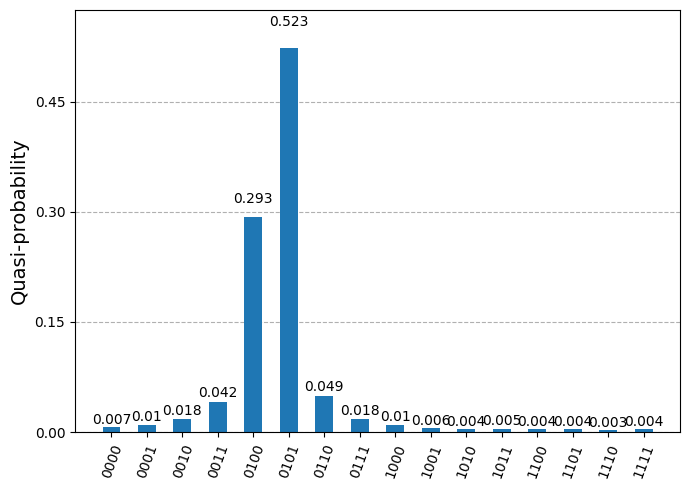

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qpe)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=10000)
result = job.result()
count = result[0].data.m.get_counts()
print(count)

from qiskit.visualization import plot_distribution
plot_distribution(count)